# <center> Homework-3 </center>

### <center> KRISHNA VAMSI GUNTUAPLLI </center>

### P1: When to applaud?

In [3203]:
import IPython.display as ipd, scipy.io as sio, numpy as np
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt
import seaborn as sns

In [3204]:
piano_audio = sio.wavfile.read('data/Piano_Clap.wav')
piano_audio

<ipython-input-3204-3ff58a73bcc6>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  piano_audio = sio.wavfile.read('data/Piano_Clap.wav')


(16000, array([-1,  0,  0, ..., -1, -1, -1], dtype=int16))

In [3205]:
piano_audio_rate = piano_audio[0]
piano_audio_array = piano_audio[1]

In [3206]:
ipd.Audio(piano_audio_array,rate=piano_audio_rate)

In [3207]:
MFCC_data = sio.loadmat('data/mfcc.mat')['X']

In [3208]:
MFCC_data

array([[ -9.59707791, -10.1109896 ,  -2.12095833, ..., -16.34098793,
        -15.04408113, -14.78239107],
       [ -2.76689826,  -2.33833407,   3.67405982, ...,  -8.95042925,
         -4.79092202,  -6.47048961],
       [ -5.15396131,  -5.10935518,  -1.02791684, ...,  -3.64511271,
         -1.88714029,  -3.29706347],
       ...,
       [  2.60156788,  -3.82018637,  -7.71536205, ...,   3.23812323,
         -7.72872338,  -2.93411992],
       [  1.41347649,   0.56192022,   2.42451385, ...,  -3.59675668,
         -6.35500873,  -4.87596432],
       [  4.19870675,   9.71611983,  -6.61095062, ...,   8.62840831,
          1.94354506,  -1.92230132]])

In [3209]:
MFCC_data.shape

(12, 962)

In [3210]:
mean_X = sio.loadmat('data/Musigma.mat')['mX']

In [3211]:
mean_X

array([[  3.3652078 , -10.15005244],
       [ -7.04006512, -13.25948228],
       [  0.5825149 ,  -4.38554562],
       [ -2.54877864,  -7.95998268],
       [ -4.36152947,  -3.51390453],
       [ -7.24886165,  -4.01613451],
       [ -5.65596363,  -3.54977218],
       [-10.37990809,  -2.50978379],
       [ -5.86041384,  -2.47567074],
       [-10.67194679,  -1.36400666],
       [ -1.21829441,  -0.45461306],
       [-12.39873707,  -0.0762892 ]])

In [3212]:
mean_X.shape

(12, 2)

In [3213]:
mean_piano = mean_X[:,0]

In [3214]:
mean_piano

array([  3.3652078 ,  -7.04006512,   0.5825149 ,  -2.54877864,
        -4.36152947,  -7.24886165,  -5.65596363, -10.37990809,
        -5.86041384, -10.67194679,  -1.21829441, -12.39873707])

In [3215]:
mean_claps = mean_X[:,1]

In [3216]:
mean_claps

array([-10.15005244, -13.25948228,  -4.38554562,  -7.95998268,
        -3.51390453,  -4.01613451,  -3.54977218,  -2.50978379,
        -2.47567074,  -1.36400666,  -0.45461306,  -0.0762892 ])

In [3217]:
covariance_X = sio.loadmat('data/Musigma.mat')['Sigma']

In [3218]:
covariance_X

array([[[ 5.22700740e+00,  9.25818114e+00],
        [-2.96920612e+00, -2.05248266e+00],
        [-1.38754176e-01, -2.91100691e+00],
        [-2.56722674e-01,  1.12151445e-01],
        [ 1.47922640e+00, -3.28053179e+00],
        [-3.21034489e+00,  1.35170862e+00],
        [ 5.80294598e-01, -1.81064381e+00],
        [-5.80947983e+00, -8.66914248e-01],
        [-4.77303186e+00, -3.46243000e+00],
        [-5.57242834e+00, -1.95743147e+00],
        [ 3.99776136e-01, -2.67231310e+00],
        [-3.24712104e+00, -1.99950725e+00]],

       [[-2.96920612e+00, -2.05248266e+00],
        [ 6.89141258e+00,  1.71077450e+01],
        [-1.69163167e+00, -7.25106666e+00],
        [-1.88471631e+00,  1.93424822e+00],
        [-2.86883099e+00,  1.80653780e+00],
        [ 2.19121444e+00, -3.45363945e-01],
        [-2.38120437e+00,  7.73232624e+00],
        [ 5.53715925e+00,  1.26172572e+00],
        [ 5.61459519e+00,  7.10958641e-01],
        [ 1.91814900e-03,  1.12881312e+00],
        [ 3.03773663e+00, -7.6

In [3219]:
covariance_X.shape

(12, 12, 2)

In [3220]:
covariance_piano = covariance_X[:,:,0]

In [3221]:
covariance_piano

array([[ 5.22700740e+00, -2.96920612e+00, -1.38754176e-01,
        -2.56722674e-01,  1.47922640e+00, -3.21034489e+00,
         5.80294598e-01, -5.80947983e+00, -4.77303186e+00,
        -5.57242834e+00,  3.99776136e-01, -3.24712104e+00],
       [-2.96920612e+00,  6.89141258e+00, -1.69163167e+00,
        -1.88471631e+00, -2.86883099e+00,  2.19121444e+00,
        -2.38120437e+00,  5.53715925e+00,  5.61459519e+00,
         1.91814900e-03,  3.03773663e+00,  4.04677906e+00],
       [-1.38754176e-01, -1.69163167e+00,  3.65016003e+00,
         1.58495258e+00,  5.38189380e-01, -1.28395889e+00,
        -1.23326700e+00, -1.69032742e+00, -4.76650162e-01,
         1.88411730e+00, -7.86400988e-02, -2.61908614e+00],
       [-2.56722674e-01, -1.88471631e+00,  1.58495258e+00,
         6.15663940e+00, -2.38532298e-01, -1.66988864e+00,
        -7.53782864e-02, -3.32291889e+00, -4.28062524e-01,
         3.91449761e+00, -9.06678001e-01, -3.12946214e+00],
       [ 1.47922640e+00, -2.86883099e+00,  5.3818938

In [3222]:
covariance_claps = covariance_X[:,:,1]

In [3223]:
covariance_claps

array([[ 9.25818114, -2.05248266, -2.91100691,  0.11215145, -3.28053179,
         1.35170862, -1.81064381, -0.86691425, -3.46243   , -1.95743147,
        -2.6723131 , -1.99950725],
       [-2.05248266, 17.107745  , -7.25106666,  1.93424822,  1.8065378 ,
        -0.34536395,  7.73232624,  1.26172572,  0.71095864,  1.12881312,
        -0.76028877, -0.02031553],
       [-2.91100691, -7.25106666, 14.07900796, -0.21251017,  2.67463457,
        -0.1163661 , -4.74229996,  1.00940034,  2.81219829,  2.81477322,
         1.68458563,  0.57222528],
       [ 0.11215145,  1.93424822, -0.21251017, 10.77559222, -1.74046221,
         1.74747876, -1.2251166 , -1.04135902,  2.91571303, -0.80533461,
         1.09290633, -0.47352981],
       [-3.28053179,  1.8065378 ,  2.67463457, -1.74046221, 15.03386617,
        -2.22244822,  5.17673869,  1.41869302,  1.05409333,  3.34029863,
        -0.01845547,  0.72679792],
       [ 1.35170862, -0.34536395, -0.1163661 ,  1.74747876, -2.22244822,
        13.67041684, -

In [3224]:
P_C1 = multivariate_normal.pdf(np.transpose(MFCC_data),mean=mean_piano,cov=covariance_piano)

In [3225]:
P_C1

array([5.82080017e-025, 6.94728060e-027, 1.77763028e-026, 7.02196050e-019,
       2.68399269e-016, 4.93539768e-019, 5.11889853e-016, 6.02428076e-013,
       2.51886791e-013, 1.01765807e-012, 1.29042459e-012, 1.59813263e-013,
       6.44290783e-014, 9.03845634e-013, 1.27004713e-012, 3.40768361e-014,
       6.89551714e-015, 7.09135271e-014, 7.19507815e-014, 6.08748395e-013,
       1.47135914e-013, 1.62093193e-012, 2.41355806e-012, 7.57129877e-013,
       6.29769966e-012, 4.03119310e-014, 3.51794191e-014, 5.25723997e-013,
       1.60046666e-012, 2.21465478e-012, 1.58014032e-011, 2.00526593e-011,
       3.62591594e-011, 1.10453473e-011, 1.34663901e-011, 1.34020656e-011,
       3.06402173e-011, 1.33089591e-013, 3.06426303e-012, 8.25338377e-012,
       1.67069957e-012, 2.79290321e-011, 5.80369246e-014, 3.16319230e-012,
       4.43029173e-013, 4.39373611e-013, 1.05331643e-011, 4.04015438e-011,
       1.68263649e-011, 1.03924994e-011, 5.55408533e-012, 1.90068617e-011,
       1.74001017e-012, 3

In [3226]:
P_C1.shape

(962,)

In [3227]:
P_C2 = multivariate_normal.pdf(np.transpose(MFCC_data),mean=mean_claps,cov=covariance_claps)

In [3228]:
P_C2

array([4.07133670e-15, 2.73593964e-17, 3.39340937e-28, 4.04373744e-19,
       2.99844037e-19, 7.93577192e-23, 1.50102482e-24, 2.92472430e-24,
       5.44942462e-27, 8.61121591e-26, 4.77015037e-24, 1.86663925e-26,
       8.99060250e-28, 7.39374128e-25, 1.73684937e-26, 2.79635061e-26,
       1.33859682e-26, 1.90206292e-28, 1.39960889e-28, 3.76658714e-24,
       8.04717932e-27, 2.86323928e-27, 1.45932005e-23, 2.10379525e-24,
       3.30907622e-24, 7.44245693e-24, 1.19629562e-26, 1.57227813e-26,
       1.59237818e-24, 7.46347654e-25, 6.55653007e-24, 1.13640213e-24,
       4.63025288e-24, 2.43275658e-23, 6.70107304e-25, 1.79668378e-24,
       2.66175017e-22, 1.07436832e-24, 1.87781929e-24, 1.38270573e-22,
       8.48171605e-25, 3.42571209e-23, 2.61904784e-24, 9.84309178e-26,
       3.71454659e-24, 4.54873687e-25, 8.61507959e-27, 2.87460888e-24,
       1.33855215e-24, 1.58452895e-26, 3.22692270e-25, 9.33935777e-25,
       1.18721133e-24, 2.62821109e-25, 4.98114737e-27, 1.36422465e-25,
      

In [3229]:
P_C2.shape

(962,)

In [3230]:
P_C1_reshaped1 = P_C1.reshape(1,962)
P_C2_reshaped2 = P_C2.reshape(1,962)

In [3241]:
P = np.append(P_C1_reshaped1,P_C2_reshaped2,axis=0)

In [3242]:
P

array([[5.82080017e-25, 6.94728060e-27, 1.77763028e-26, ...,
        1.35301120e-52, 2.74435921e-40, 3.39649762e-43],
       [4.07133670e-15, 2.73593964e-17, 3.39340937e-28, ...,
        3.02794840e-15, 4.86047610e-18, 1.51320727e-16]])

In [3243]:
P.shape

(2, 962)

In [3244]:
for i in range(962):
    P[:,i]/=sum(P[:,i])

In [3245]:
P

array([[1.42970248e-10, 2.53926677e-10, 9.81268072e-01, ...,
        4.46840905e-38, 5.64627652e-23, 2.24456865e-27],
       [1.00000000e+00, 1.00000000e+00, 1.87319281e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [3246]:
P.shape

(2, 962)

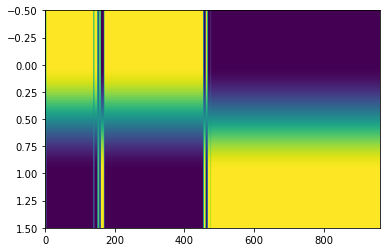

In [3247]:
plt.imshow(P, aspect = 'auto')

In [3248]:
Transition_matrix = np.array([[0.9,0.1],[0,1]])

In [3249]:
posterior_probability = np.zeros((2,962))
posterior_probability[:,0] = P[:,0]

In [3250]:
for i in range(1,962):
    b = np.argmax(posterior_probability[:,i-1])
    posterior_probability[:,i] = np.multiply(np.transpose(Transition_matrix[b,:]),P[:,i])

In [3251]:
posterior_probability

array([[1.42970248e-10, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.87319281e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [3253]:
for i in range(962):
    posterior_probability[:,i]/=sum(posterior_probability[:,i])

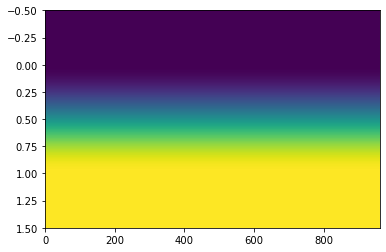

In [3254]:
plt.imshow(posterior_probability, aspect = 'auto')

In [3255]:
posterior_probability = np.zeros((2,962))
posterior_probability[:,0] = P[:,0]

In [3256]:
B = np.zeros((2,962))

In [3257]:
for i in range(1,962):
    for j in range(2):
        b=np.argmax(Transition_matrix[:,j]*posterior_probability[:,i-1])
        B[j,i]=b
        posterior_probability[j,i]=Transition_matrix[b,j]*posterior_probability[b,i-1]*P[j,i]

In [3258]:
for i in range(962):
    posterior_probability[:,i]/=sum(posterior_probability[:,i])

In [3259]:
new_posterior_probability = np.array(np.zeros((962,)))
new_posterior_probability[-1]=np.argmax(posterior_probability[:,-1])
for i in range(960,-1,-1):
    b=int(new_posterior_probability[i+1])
    new_posterior_probability[i]=B[b,i]

In [3260]:
P_bar=np.zeros(posterior_probability.shape).T

In [3261]:
for i in range(len(new_posterior_probability)):
    if new_posterior_probability[i]:
        P_bar[i,1]=1
    else:
        P_bar[i,0]=1

In [3262]:
P_bar=P_bar.T

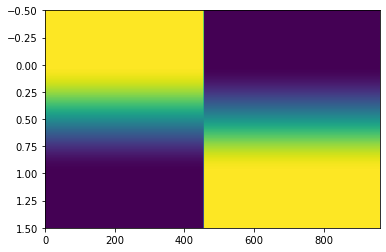

In [3263]:
plt.imshow(P_bar, aspect='auto');

Around after 450, we can observe the difference. Piano and Clap signals are seperated. This is no the case with posterior probability matrix.

### P2: Multidimensional Scaling

In [3269]:
data_matrix = loadmat('data/MDS_pdist.mat')['L'] 

In [3270]:
data_matrix

array([[0.0000e+00, 1.0000e+00, 4.0000e+00, ..., 2.8373e+04, 2.8418e+04,
        2.8465e+04],
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.8330e+04, 2.8373e+04,
        2.8418e+04],
       [4.0000e+00, 1.0000e+00, 0.0000e+00, ..., 2.8289e+04, 2.8330e+04,
        2.8373e+04],
       ...,
       [2.8373e+04, 2.8330e+04, 2.8289e+04, ..., 0.0000e+00, 1.0000e+00,
        4.0000e+00],
       [2.8418e+04, 2.8373e+04, 2.8330e+04, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.8465e+04, 2.8418e+04, 2.8373e+04, ..., 4.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [3271]:
data_matrix.shape

(3099, 3099)

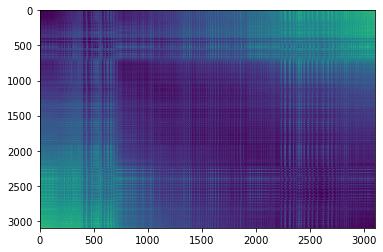

In [3272]:
plt.imshow(data_matrix, aspect='auto')

In [3273]:
mean_row = np.array(np.zeros((3099,)))
for i in range(3099):
    mean_of_data_matrix = np.mean(data_matrix[i])
    mean_row[i] = mean_of_data_matrix

In [3274]:
mean_row

array([12487.22394321, 12451.44498225, 12417.6660213 , ...,
       10359.46757018, 10367.68860923, 10377.90964827])

In [3275]:
data_matrix -= mean_row

In [3276]:
data_matrix

array([[-12487.22394321, -12450.44498225, -12413.6660213 , ...,
         18013.53242982,  18050.31139077,  18087.09035173],
       [-12486.22394321, -12451.44498225, -12416.6660213 , ...,
         17970.53242982,  18005.31139077,  18040.09035173],
       [-12483.22394321, -12450.44498225, -12417.6660213 , ...,
         17929.53242982,  17962.31139077,  17995.09035173],
       ...,
       [ 15885.77605679,  15878.55501775,  15871.3339787 , ...,
        -10359.46757018, -10366.68860923, -10373.90964827],
       [ 15930.77605679,  15921.55501775,  15912.3339787 , ...,
        -10358.46757018, -10367.68860923, -10376.90964827],
       [ 15977.77605679,  15966.55501775,  15955.3339787 , ...,
        -10355.46757018, -10366.68860923, -10377.90964827]])

In [3277]:
mean_column = np.array(np.zeros((3099,)))
for i in range(3099):
    mean_of_data_matrix = np.mean(data_matrix[:,i])
    mean_column[i] = mean_of_data_matrix

In [3278]:
mean_column

array([ 1.20209432e-12, -1.20209432e-12,  0.00000000e+00, ...,
        6.01047160e-13, -6.01047160e-13,  6.01047160e-13])

In [3279]:
data_matrix -= mean_column

In [3280]:
data_matrix

array([[-12487.22394321, -12450.44498225, -12413.6660213 , ...,
         18013.53242982,  18050.31139077,  18087.09035173],
       [-12486.22394321, -12451.44498225, -12416.6660213 , ...,
         17970.53242982,  18005.31139077,  18040.09035173],
       [-12483.22394321, -12450.44498225, -12417.6660213 , ...,
         17929.53242982,  17962.31139077,  17995.09035173],
       ...,
       [ 15885.77605679,  15878.55501775,  15871.3339787 , ...,
        -10359.46757018, -10366.68860923, -10373.90964827],
       [ 15930.77605679,  15921.55501775,  15912.3339787 , ...,
        -10358.46757018, -10367.68860923, -10376.90964827],
       [ 15977.77605679,  15966.55501775,  15955.3339787 , ...,
        -10355.46757018, -10366.68860923, -10377.90964827]])

In [3281]:
u,s,vh=np.linalg.svd(data_matrix)

In [3282]:
s=np.diag(s)

In [3283]:
picture=np.dot(u,np.power(s,0.5))

In [3284]:
picture.shape

(3099, 3099)

In [3285]:
picture=picture[:,:2]

In [3286]:
picture

array([[-134.22850941,   33.59490339],
       [-134.13656584,   32.15206559],
       [-134.05395037,   30.7110216 ],
       ...,
       [  93.7953011 ,   -6.99446433],
       [  93.68202679,   -8.39783852],
       [  93.55942441,   -9.79941891]])

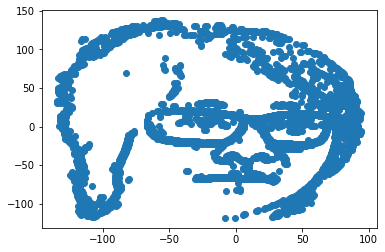

In [3287]:
plt.scatter(picture[:,0],picture[:,1]);

In [3288]:
rotate=np.array([[0,1],[-1,0]])
picture=np.transpose(np.dot(rotate,np.transpose(picture)))

In [3289]:
picture.shape

(3099, 2)

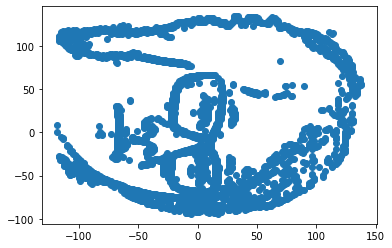

In [3290]:
plt.scatter(picture[:,0],picture[:,1]);

### P3: KERNEL PCA

In [3291]:
from scipy.io import loadmat
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt, numpy as np

In [3292]:
X = loadmat('data/concentric.mat')['X']

In [3293]:
X

array([[ 1.03010449e-01,  9.98893136e-02,  8.01525071e-02,
         9.01637216e-02,  9.42734263e-02,  9.67806758e-02,
         7.83636885e-02,  5.38195625e-02,  5.57237608e-02,
         4.69538050e-02,  3.26034026e-02,  1.69590659e-02,
         5.94388496e-03, -6.50218740e-03, -2.12074823e-02,
        -3.06603685e-02, -4.25259333e-02, -5.97044802e-02,
        -7.10441002e-02, -7.55207155e-02, -7.15659692e-02,
        -8.30744108e-02, -9.88110424e-02, -1.06121124e-01,
        -1.04544158e-01, -9.56139964e-02, -1.01646048e-01,
        -8.36424651e-02, -1.00619615e-01, -8.25826182e-02,
        -9.51582875e-02, -6.97758861e-02, -6.14712499e-02,
        -5.11961447e-02, -5.11046944e-02, -3.24007131e-02,
        -1.58489351e-02, -5.46457570e-03,  6.96449122e-03,
         1.92327526e-02,  3.29601325e-02,  3.75675024e-02,
         4.99079743e-02,  6.58753056e-02,  6.00910642e-02,
         8.09744514e-02,  9.15559690e-02,  8.38286757e-02,
         9.36023555e-02,  1.10703703e-01,  1.14542918e-0

In [3294]:
X.shape

(2, 152)

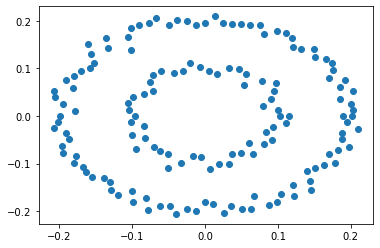

In [3295]:
plt.scatter(X[0],X[1]);

In [3298]:
d = np.zeros((152,152))

In [3301]:
for i in range(152):
    for j in range(152):
        d[i,j]=np.linalg.norm(X[:,i]-X[:,j])

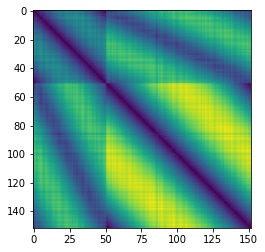

In [3302]:
plt.imshow(d)

In [3303]:
temp = np.multiply(d,d)

In [3304]:
K=np.exp(-(temp))

In [3305]:
K

array([[1.        , 0.99983103, 0.99905444, ..., 0.98792255, 0.99152819,
        0.99025795],
       [0.99983103, 1.        , 0.99954719, ..., 0.98643546, 0.99048921,
        0.98947931],
       [0.99905444, 0.99954719, 1.        , ..., 0.98110075, 0.98596255,
        0.98485672],
       ...,
       [0.98792255, 0.98643546, 0.98110075, ..., 1.        , 0.99955335,
        0.99923172],
       [0.99152819, 0.99048921, 0.98596255, ..., 0.99955335, 1.        ,
        0.99979383],
       [0.99025795, 0.98947931, 0.98485672, ..., 0.99923172, 0.99979383,
        1.        ]])

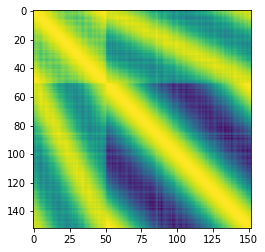

In [3306]:
plt.imshow(K)

In [3307]:
value,vector = np.linalg.eig(d)

In [3308]:
value

array([ 3.41070962e+01, -1.01771034e+01, -9.95243459e+00, -1.90273673e+00,
       -1.84194293e+00, -1.79802841e+00, -7.47267224e-01, -7.29317194e-01,
       -6.25905658e-01, -6.04605764e-01, -3.99583263e-01, -3.96665172e-01,
       -2.97723790e-01, -2.84415065e-01, -2.53670130e-01, -2.45010493e-01,
       -1.73087854e-01, -1.69916617e-01, -1.62319472e-01, -1.51142548e-01,
       -1.26096852e-01, -1.24178883e-01, -9.73490721e-02, -9.64938948e-02,
       -9.50966994e-02, -9.20081646e-02, -7.72423211e-02, -7.53400567e-02,
       -6.50951324e-02, -6.27689203e-02, -6.12522598e-02, -5.99779838e-02,
       -5.42788531e-02, -5.16167327e-02, -4.98681811e-02, -4.78006240e-02,
       -4.60119076e-02, -4.41109145e-02, -4.29273779e-02, -4.17590306e-02,
       -4.01148129e-02, -3.82300407e-02, -3.65459104e-02, -3.58504364e-02,
       -3.51996469e-02, -3.39968100e-02, -3.28090102e-02, -3.24287794e-02,
       -3.14983646e-02, -2.95470359e-02, -2.93355495e-02, -2.87267560e-02,
       -2.75099135e-02, -

In [3309]:
vector

array([[-6.76752226e-02,  8.07628506e-02,  1.09948391e-02, ...,
         2.14652744e-05, -8.50227658e-04, -1.11069273e-03],
       [-6.73831771e-02,  7.97089845e-02,  7.27792711e-04, ...,
        -1.05477333e-05, -4.86965796e-04, -2.73808864e-04],
       [-6.53660704e-02,  6.63919876e-02, -7.64912364e-03, ...,
         2.88285288e-05,  2.72066906e-03,  4.02858442e-04],
       ...,
       [-8.98023973e-02,  1.26943513e-01,  3.27084120e-02, ...,
        -2.10768841e-05,  1.61197700e-03, -1.96188949e-04],
       [-8.52877901e-02,  1.24790664e-01,  2.39497155e-02, ...,
        -6.11041782e-05, -2.89457977e-03,  4.62301375e-04],
       [-8.70844638e-02,  1.28073659e-01,  1.62193304e-02, ...,
        -1.32204360e-05,  1.49809131e-04, -1.21783390e-03]])

In [3310]:
a = vector[:,0:3]

In [3311]:
a

array([[-6.76752226e-02,  8.07628506e-02,  1.09948391e-02],
       [-6.73831771e-02,  7.97089845e-02,  7.27792711e-04],
       [-6.53660704e-02,  6.63919876e-02, -7.64912364e-03],
       [-6.69648390e-02,  7.44339855e-02, -1.86511839e-02],
       [-6.83797034e-02,  7.77742622e-02, -3.06781032e-02],
       [-7.01938105e-02,  7.95761746e-02, -4.40860256e-02],
       [-6.84387305e-02,  6.72153168e-02, -4.93123980e-02],
       [-6.56709165e-02,  4.89630708e-02, -4.63840018e-02],
       [-6.80271582e-02,  5.10813854e-02, -6.30298171e-02],
       [-6.89359700e-02,  4.47731975e-02, -7.26183248e-02],
       [-6.83004486e-02,  3.39964323e-02, -7.50011237e-02],
       [-6.64396367e-02,  2.13057226e-02, -6.89713557e-02],
       [-6.69573785e-02,  1.29434516e-02, -7.41499329e-02],
       [-6.81293262e-02,  3.79376008e-03, -8.14120249e-02],
       [-6.95324140e-02, -6.91361647e-03, -8.76207153e-02],
       [-6.76123097e-02, -1.59578822e-02, -7.71629217e-02],
       [-6.77226703e-02, -2.56148410e-02

In [3312]:
y = np.matmul(np.transpose(a),K)

In [3313]:
y

array([[-1.17510639e+01, -1.17567102e+01, -1.17939403e+01,
        -1.17654163e+01, -1.17412311e+01, -1.17106744e+01,
        -1.17415870e+01, -1.17912171e+01, -1.17498142e+01,
        -1.17345895e+01, -1.17459542e+01, -1.17787796e+01,
        -1.17698697e+01, -1.17497097e+01, -1.17258272e+01,
        -1.17588965e+01, -1.17570107e+01, -1.17289299e+01,
        -1.17283715e+01, -1.17470934e+01, -1.17798410e+01,
        -1.17661491e+01, -1.17393369e+01, -1.17307878e+01,
        -1.17407008e+01, -1.17629107e+01, -1.17470081e+01,
        -1.17818584e+01, -1.17325235e+01, -1.17650249e+01,
        -1.17077851e+01, -1.17616078e+01, -1.17600063e+01,
        -1.17620368e+01, -1.17013330e+01, -1.17407652e+01,
        -1.17853594e+01, -1.17807198e+01, -1.17265574e+01,
        -1.17472141e+01, -1.17379598e+01, -1.17795557e+01,
        -1.17697351e+01, -1.17472664e+01, -1.17920307e+01,
        -1.17557298e+01, -1.17459952e+01, -1.17780077e+01,
        -1.17646922e+01, -1.17299697e+01, -1.17228274e+0

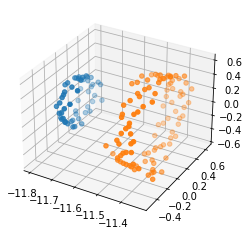

In [3314]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.scatter(y[0][:51], y[1][:51], y[2][:51]);

ax.scatter(y[0][51:], y[1][51:], y[2][51:]);

plt.show()

In [3315]:
temp = [ [ 0 for i in range(51) ] ]
temp1 = [ [ 1 for i in range(101)] ]

In [3316]:
l = np.append(temp,temp1)

In [3317]:
l

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [3318]:
y.shape

(3, 152)

In [3319]:
y = np.transpose(y)
for i in range(3):
    y_max = np.max(y[:,i])
    y_min = np.min([y[:,i]])
    y_mean = np.mean(y[:,i])
   
    y[:,i]=(y[:,i]- y_mean)/(y_max-y_min)

In [3320]:
y.shape

(152, 3)

In [3321]:
trns = np.append(y,l[:,np.newaxis],axis=1)

In [3322]:
y = np.transpose(y)

In [3323]:
trns.shape

(152, 4)

In [3324]:
np.random.shuffle(trns)
trns = np.transpose(trns)

In [3325]:
trns.shape

(4, 152)

In [3326]:
s = (0.8*152)
s = int(s)

In [3327]:
train = trns[:,:s]
train

array([[ 0.43922959,  0.21751525,  0.13823684, -0.49413666,  0.31466407,
        -0.44658078, -0.48551635,  0.14169215, -0.40806048, -0.4922599 ,
         0.32225092, -0.4913387 , -0.37575833,  0.20530893, -0.4814668 ,
         0.23755614,  0.3352707 ,  0.13051417, -0.42515496,  0.08517575,
         0.28831589, -0.53049319,  0.06470316,  0.14323949, -0.46869638,
         0.19617339,  0.11701821,  0.26011422, -0.49867675,  0.11885003,
        -0.44055631, -0.44644242, -0.52988047, -0.36190286,  0.20885493,
         0.33092027,  0.32697737, -0.43331877,  0.39468342, -0.52655625,
        -0.44834539,  0.16100256,  0.24809393,  0.17067928,  0.3460256 ,
         0.34920041,  0.18031318,  0.3037492 ,  0.07067626,  0.13795505,
         0.34928696,  0.1273769 ,  0.17896026,  0.32492524, -0.46017008,
        -0.41450248, -0.00348099,  0.183526  , -0.53482537, -0.48789956,
         0.29382626,  0.35446674,  0.28493919, -0.45772377, -0.46042932,
         0.29721484,  0.32049593, -0.44351352, -0.4

In [3328]:
tr_f = train[:3,:]
tr_f.shape

(3, 121)

In [3329]:
tr_l = train[3,:]
tr_l

array([1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [3330]:
test = trns[:,s:]
test

array([[-0.42339806,  0.23593827,  0.29749621, -0.54234363, -0.41607054,
         0.24698602,  0.29640889,  0.3736845 ,  0.27072734, -0.42888217,
         0.16472111, -0.53238033,  0.20551056,  0.27643134,  0.25211825,
         0.19667207,  0.29944763, -0.46601283,  0.16463515,  0.21651683,
        -0.55666975,  0.25983833,  0.28094155,  0.25301565, -0.55492258,
         0.29044423,  0.30655934,  0.20360801,  0.26463708,  0.12652191,
        -0.49951732],
       [ 0.26519566, -0.41093477, -0.33943034, -0.06717917, -0.0192262 ,
         0.48153978,  0.44491418, -0.24785159,  0.2823894 , -0.26302031,
         0.02208318, -0.04262215,  0.1400561 ,  0.42664102, -0.0074992 ,
        -0.3866333 , -0.43896587,  0.16046471, -0.4235339 , -0.46428284,
         0.12886456, -0.09313464, -0.49243954,  0.47908877,  0.14973196,
         0.4756773 ,  0.17984029,  0.19840235, -0.41194275, -0.35526426,
         0.23029263],
       [ 0.0696195 , -0.25311274,  0.3611221 ,  0.20316413,  0.27665076,
       

In [3331]:
te_f = test[:3,:]
te_f

array([[-0.42339806,  0.23593827,  0.29749621, -0.54234363, -0.41607054,
         0.24698602,  0.29640889,  0.3736845 ,  0.27072734, -0.42888217,
         0.16472111, -0.53238033,  0.20551056,  0.27643134,  0.25211825,
         0.19667207,  0.29944763, -0.46601283,  0.16463515,  0.21651683,
        -0.55666975,  0.25983833,  0.28094155,  0.25301565, -0.55492258,
         0.29044423,  0.30655934,  0.20360801,  0.26463708,  0.12652191,
        -0.49951732],
       [ 0.26519566, -0.41093477, -0.33943034, -0.06717917, -0.0192262 ,
         0.48153978,  0.44491418, -0.24785159,  0.2823894 , -0.26302031,
         0.02208318, -0.04262215,  0.1400561 ,  0.42664102, -0.0074992 ,
        -0.3866333 , -0.43896587,  0.16046471, -0.4235339 , -0.46428284,
         0.12886456, -0.09313464, -0.49243954,  0.47908877,  0.14973196,
         0.4756773 ,  0.17984029,  0.19840235, -0.41194275, -0.35526426,
         0.23029263],
       [ 0.0696195 , -0.25311274,  0.3611221 ,  0.20316413,  0.27665076,
       

In [3332]:
te_l = test[3,:]
te_l

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.])

In [3333]:
def logistic(data):
    return (1/(1+np.exp(-data)))

In [3334]:
def d_logistic(data):
    temp = 1/(1+np.exp(-data))
    return np.multiply(temp,(1-temp))

In [3335]:
def train_perceptron(X_train,Y_train):
    global random_init_weights
    random_init_weights = np.random.rand(4,1)
    p = np.ones(X_train.shape[1])
    p = p[:, np.newaxis]
    X_train = np.append(np.transpose(X_train),p,axis=1)
    X_train = np.transpose(X_train)
    
    e = []
    for i in range(50000):
        temp = np.matmul(np.transpose(random_init_weights),X_train)
        pred = logistic(temp)
        
        temp1 = Y_train-pred
        result = np.matmul(temp1,np.transpose(temp1))
        mean_square_error = (1/2)*result[0]
        e.append(mean_square_error)
        
        temp2 = d_logistic(np.matmul(np.transpose(random_init_weights),X_train))
        gradient=np.matmul(X_train,np.transpose(temp1*temp2))
        random_init_weights+=((1/(2*len(Y_train)))*0.8)*(gradient)
        
    plt.plot(e)

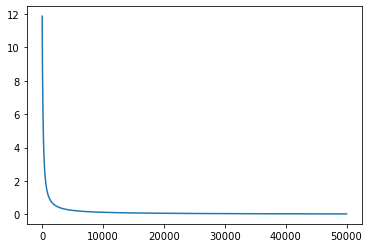

In [3336]:
train_perceptron(tr_f,tr_l)

In [3337]:
def accuracy(X_test,Y_test):
    p = np.ones(X_test.shape[1])
    p = p[:, np.newaxis]
    X_test = np.append(np.transpose(X_test),p,axis=1)
    X_test = np.transpose(X_test)

    X_test = np.matmul(np.transpose(random_init_weights),X_test)
    pred = logistic(X_test)
    
    pred=np.array([1 if i>=0.5 else 0 for i in pred[0]])
    
    return (sum(pred==Y_test)/len(Y_test))*100

In [3338]:
print('Accuracy',accuracy(te_f,te_l))

Accuracy 100.0


In [3339]:
random_init_weights

array([[13.03204549],
       [ 0.06847345],
       [-0.11590598],
       [ 2.09074266]])

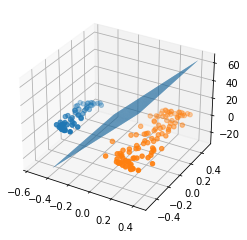

In [3340]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.scatter(y[0][:51], y[1][:51], y[2][:51]);

ax.scatter(y[0][51:], y[1][51:], y[2][51:]);

X = np.linspace(-0.4,0.4)
Y = np.linspace(-0.5,0.5)
X,Y = np.meshgrid(X,Y)
Z = (-random_init_weights[3,0] - random_init_weights[0,0]*X - random_init_weights[1,0]*Y) / random_init_weights[2,0]
ax.plot_surface(X, Y, Z)
plt.show()

### P4: Neural Network for Source Separation

In [3779]:
from scipy.io import wavfile
import IPython.display as ipd,scipy.signal as signal

In [3780]:
samplerate_speech,speech_signal = wavfile.read('data/trs.wav')
ipd.Audio(speech_signal, rate=samplerate_speech)

In [3781]:
samplerate_noise,noise_signal = wavfile.read('data/trn.wav')
ipd.Audio(noise_signal,rate=samplerate_noise)

In [3782]:
mixed_signal = np.add(speech_signal,noise_signal)

In [3783]:
mixed_signal

array([ -177, -1058,    62, ...,   -25,    30,  -162], dtype=int16)

In [3784]:
ipd.Audio(mixed_signal,rate=samplerate_noise)

In [3785]:
f_trs,t_trs,S = signal.stft(speech_signal,samplerate_speech,nperseg=1024,noverlap=512)

In [3786]:
f_trn,t_trn,N = signal.stft(noise_signal,samplerate_speech,nperseg=1024,noverlap=512)

In [3787]:
f_mixed,t_mixed, mixed = signal.stft(mixed_signal,samplerate_speech,nperseg=1024,noverlap=512)

In [3788]:
mixed_abs = np.absolute(mixed)

In [3789]:
mixed_abs.shape

(513, 789)

In [3790]:
mixed_abs = np.transpose(mixed_abs)
for i in range(513):
    mixed_max = np.max(mixed_abs[:,i])
    mixed_min = np.min([mixed_abs[:,i]])
    mixed_mean = np.mean(mixed_abs[:,i])
   
    mixed_abs[:,i]=(mixed_abs[:,i]- mixed_mean)/(mixed_max-mixed_min)

In [3791]:
mixed_abs = np.transpose(mixed_abs)

In [3792]:
mixed_abs

array([[ 0.7052376 , -0.1095498 , -0.00632541, ..., -0.02112485,
        -0.09122854, -0.10168879],
       [ 0.43023726, -0.08986709, -0.03064579, ..., -0.06120044,
        -0.11941503, -0.09674176],
       [ 0.18241069, -0.01013053, -0.0421018 , ..., -0.06038649,
        -0.06296846, -0.05978716],
       ...,
       [ 0.1085289 ,  0.1495349 ,  0.09044739, ..., -0.01234337,
        -0.04373334, -0.0448758 ],
       [ 0.19911362,  0.20372903,  0.1025167 , ..., -0.01014477,
        -0.01183543, -0.04448417],
       [ 0.27778068,  0.28914464,  0.07333007, ..., -0.03959924,
         0.01508121, -0.03328591]], dtype=float32)

In [3793]:
Masked=np.absolute(S)>np.absolute(N)

In [3794]:
Masked

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [3795]:
class ShallowNeuralNetwork:
    def __init__(self):
        self.W1=np.random.randn(50,513)*0.01
        self.b1=np.zeros((50,1))
        self.W2=np.random.randn(513,50)*0.01
        self.b2=np.zeros((513,1))
        
    def logistic(self,data):
        temp = 1/(1+np.exp(-data))
        return temp
    
    def d_logistic(self,data):
        temp = 1/(1+np.exp(-data))
        return np.multiply(temp,(1-temp))
    
    def backward(self,p,X,Y):
        Z1 = p[0]
        A1 = p[1]
        Z2 = p[2]
        A2 = p[3]
    
        len_Y = len(Y)
    
        dZ2 = np.subtract(A2,Y)
        dW2 = (1/len_Y)*np.dot(dZ2,np.transpose(A1))
        db2 = (1/len_Y)*np.sum(dZ2,axis=1,keepdims=True)
        dZ1 = np.dot((np.transpose(self.W2)),dZ2)*self.d_logistic(Z1)
        dW1 = (1/len_Y)*np.dot(dZ1,np.transpose(X))
        db1 = (1/len_Y)*np.sum(dZ1,axis=1,keepdims=True)
    
        self.W1 = self.W1 - 0.5*dW1
        self.W2 = self.W2 - 0.5*dW2
        self.b1 = self.b1 - 0.5*db1
        self.b2 = self.b2 - 0.5*db2 
    
    def forward(self,X):
        Z1 = (np.dot(self.W1,X)+self.b1)
        A1 = self.logistic(Z1)
        Z2 = (np.dot(self.W2,A1)+self.b2)
        A2 = self.logistic(Z2)
    
        return Z1,A1,Z2,A2
    
    def loss(self,x,y):
        
        x=np.transpose(x)
        temp = x.shape[1]
        temp2 = np.matmul(y,(np.log(x)))
        temp1 = (1/(temp))*np.trace(-1*(temp2+np.matmul(1-y,(np.log(1-x)))))
        return temp1

    
    def train(self,X,Y):

        l = []
        count = 0
        while count <10000:
            n_output = 513
        
            X_transpose = np.transpose(X)
            Y_transpose = np.transpose(Y)
            d = np.concatenate((X_transpose,Y_transpose),axis=1)
            np.random.shuffle(d)
            d = np.transpose(d)
            X=d[:n_output,:]
            Y=d[n_output:,:]
        
            p = self.forward(X)
            temp = p[3]
            l.append(self.loss(temp,Y))
        
            self.backward(p,X,Y)
            count += 1
        return l 
    
    def prediction(self,X):
        return self.forward(X)[3]

In [3796]:
model = ShallowNeuralNetwork()

In [3797]:
loss = model.train(mixed_abs,Masked)

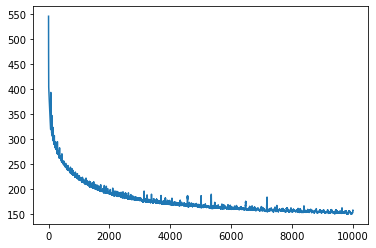

In [3798]:
plt.plot(loss)

In [3799]:
predictedfilter = model.prediction(mixed_abs)

In [3800]:
spectogram = predictedfilter * mixed

In [3801]:
mixed_f_inv,mixed_istft = signal.istft(spectogram,samplerate_speech,nperseg=1024)

In [3802]:
ipd.Audio(mixed_istft,rate=samplerate_speech)

In [3803]:
n = np.power(np.linalg.norm(speech_signal),2)
d = np.power(np.linalg.norm(speech_signal-mixed_signal),2)
SNR = np.multiply(10,np.log10(n/d))

In [3804]:
SNR

1.2212670727546508e-05

In [3805]:
speech_signal.shape

(403255,)

In [3806]:
mixed_istft.shape

(403456,)

The shape of clear speech signal is 403255. The shape of mixed_istft signal is 403456. Since, subtraction is not possible with two different matrix sizes, taking only the first 403255 of mixed_istft.

In [3807]:
n = np.power(np.linalg.norm(speech_signal),2)
d = np.power(np.linalg.norm(speech_signal-mixed_istft[:403255]),2)
SNR = np.multiply(10,np.log10(n/d))

In [3808]:
SNR

11.81577887123086

In [3809]:
samplerate_test,mixed_test = wavfile.read('data/tex.wav')
samplerate1_test,clear_test = wavfile.read('data/tes.wav')

In [3810]:
ipd.Audio(mixed_test,rate=samplerate_test)

In [3811]:
ipd.Audio(clear_test,rate=samplerate1_test)

In [3812]:
f_test_noise,t_test_noise,mixed_test_stft = signal.stft(mixed_test,samplerate_test,nperseg=1024,noverlap=512)

In [3813]:
f_test_clear,t_test_clear,clear_test_stft = signal.stft(clear_test,samplerate1_test,nperseg=1024,noverlap=512)

In [3814]:
mixed_test_stft_abs = np.absolute(mixed_test_stft)

In [3815]:
predictedfilter = model.prediction(mixed_test_stft_abs)

<ipython-input-3795-c92e2732e0ef>:9: RuntimeWarning: overflow encountered in exp
  temp = 1/(1+np.exp(-data))


In [3816]:
spectogram = predictedfilter * mixed_test_stft

In [3817]:
f_test_mixed,mixed_test_istft = signal.istft(spectogram,samplerate1_test,nperseg=1024)

In [3818]:
ipd.Audio(mixed_test_istft, rate=samplerate1_test)

In [3819]:
n = np.power(np.linalg.norm(clear_test),2)
d = np.power(np.linalg.norm(clear_test-mixed_test),2)
SNR = np.multiply(10,np.log10(n/d))

In [3820]:
SNR

8.987217043802658e-05

In [3821]:
clear_test.shape

(50791,)

In [3822]:
mixed_test_istft.shape

(51200,)

The shape of clear speech signal is 50791.
The shape of mixed_test_istft signal is 51200.
Since, subtraction is not possible with two different matrix sizes, taking only the first 50791 of mixed_test_istft.

In [3823]:
n = np.power(np.linalg.norm(clear_test),2)
d = np.power(np.linalg.norm(clear_test-mixed_test_istft[0:-409]),2)
SNR = np.multiply(10,np.log10(n/d))

In [3824]:
SNR

9.089100405744812